## Social Computing: Notebook 2
# Using APIs

Please inlcude your names below and edit the name of the file to include the last names of the people answering

In [ ]:
# Students: 
# Student1: Rupal Saxena
# Student2: Orestis Oikonomou

In [1]:
import requests
import json
import os

### 1. Google books (20 points total)
#### Setting the request URL parameters
You can set the parameters of the API request according to the documentation below. The first part of the request is always the same, and the "q" which stands for question will take various parameters. <br>
More documentation can be found at: https://developers.google.com/books/docs/v1/using?hl=vi#ids

<img src="parameters.png" width=80%> </img>

**Example**: `https://www.googleapis.com/books/v1/volumes?q=isbn:9780141909882` returns information about the book with the given ISBN number (Everything is illuminated by Jonathan Safran Foer).

**Exercise 1.1 (6 points)**

Using the above parameters create the following request URLs!
    1. Requesting books that have "potter" in the title
    2. Requesting books that have "doyle" as author
    3. With isbn "1904633684"
    4. With id "2bGdK8CRKoEC"
    5. Second result page when searching books that has "detective" listed in the category list
    6. Second result page when searching books that have "potter in the title but showing 40 results in one page, not 10. 
<br>

Try and see whether they work with `requests.get()`!

In [2]:
result_A = 'https://www.googleapis.com/books/v1/volumes?q=title:potter'
result_B = 'https://www.googleapis.com/books/v1/volumes?q=author:doyle'
result_C = 'https://www.googleapis.com/books/v1/volumes?q=isbn:1904633684'
result_D = 'https://www.googleapis.com/books/v1/volumes?q=id:2bGdK8CRKoEC'
result_E = 'https://www.googleapis.com/books/v1/volumes?q=category_list:detective&page=2'
result_F = 'https://www.googleapis.com/books/v1/volumes?q=intitle:potter&maxResults=40'

In [3]:
#check with requests
print(requests.get(result_A).text)
print(requests.get(result_B).text)
print(requests.get(result_C).text)
print(requests.get(result_D).text)
print(requests.get(result_E).text)
print(requests.get(result_F).text)
#continue to check all your URLs this way!

Streaming output truncated to the last 5000 lines.
        "infoLink": "https://play.google.com/store/books/details?id=L12E2xzZ7PUC&source=gbs_api",
        "canonicalVolumeLink": "https://play.google.com/store/books/details?id=L12E2xzZ7PUC"
      },
      "saleInfo": {
        "country": "US",
        "saleability": "FREE",
        "isEbook": true,
        "buyLink": "https://play.google.com/store/books/details?id=L12E2xzZ7PUC&rdid=book-L12E2xzZ7PUC&rdot=1&source=gbs_api"
      },
      "accessInfo": {
        "country": "US",
        "viewability": "ALL_PAGES",
        "embeddable": true,
        "publicDomain": true,
        "textToSpeechPermission": "ALLOWED",
        "epub": {
          "isAvailable": false,
          "downloadLink": "http://books.google.com/books/download/Monthly_Catalogue_United_States_Public_D.epub?id=L12E2xzZ7PUC&hl=&output=epub&source=gbs_api"
        },
        "pdf": {
          "isAvailable": false
        },
        "webReaderLink": "http://play.google.co

**Exercise 1.2. (14 points)** 

Define a function that sends a request to the google books API with the URL parameters as inputs to the function. Try to incorporate as many as the variables as possible and output a URL according to the settings you want to have. Don't forget to write a docstring explaning how the function works. Docstrings are explanations to functions, describing the input, output, and purpose of the function. If you haven't used them before, you can find more examples for example at: https://www.geeksforgeeks.org/python-docstrings/

In [4]:
def request_books_api(params):
    '''
    Input: dict of parameters with key as parameter name and value as value of parameter
    Output: URL according to the settings we wanna have
    purpose: purpose of this function is to create a URL for requesting from google books API
    '''
    key_url = "https://www.googleapis.com/books/v1/volumes?q="
    for i, key in enumerate(params):
      value = params[key]
      key_url = key_url + str(key) + ":" + str(value)
      if i != len(params)-1:
        key_url += "&"
    res = requests.get(key_url)
    return res

In [5]:
## call your function here inside a print() statement
params = {"title":"potter", "author":"doyle", "intitle":"potter"}
print(request_books_api(params))

<Response [200]>


In [6]:
## test out your docstring here
print(request_books_api.__doc__)


    Input: dict of parameters with key as parameter name and value as value of parameter
    Output: URL according to the settings we wanna have
    purpose: purpose of this function is to create a URL for requesting from google books API
    


#### Useful knowledge: Status codes

Responses contain information even without looking into the textual content. printing the response tells us the URL we requested, the date, its status, the content type and the size of the response object

The most important for us is the status: it tells us whether our request has been successful: You can find a list of HTTP status codes here https://en.wikipedia.org/wiki/List_of_HTTP_status_codes.
Or, you can always check HTTP Status Cats: https://www.flickr.com/photos/girliemac/sets/72157628409467125

The most important status codes for us are:

- successful call: code 200
- client error: 4xx, e.g. 401: Unauthorized, 404: Not found
- server error: 5xx, e.g. 500: Internal Server Error, 502: Bad Gateway

### 2. Parsing json (40 points total)

**Exercise 2.1. (2 points)** 

Using the previously defined function, query the book with isbn number 1904633684 and print the text of the result. 

In [7]:
## your code here
params = {"isbn":"1904633684"}
res = request_books_api(params)
print(res)

<Response [200]>


**Exercise 2.2. (2 points)** 

Now load the previous response into a json object.:

In [8]:
## your code here
json_value = json.loads(res.text)
print(json_value)


{'kind': 'books#volumes', 'totalItems': 1, 'items': [{'kind': 'books#volume', 'id': 'tBasGxqDMbMC', 'etag': 'Ex0RRLvj7LQ', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/tBasGxqDMbMC', 'volumeInfo': {'title': 'The Case-book of Sherlock Holmes', 'authors': ['Arthur Conan Doyle'], 'publisher': "Collector's Library", 'publishedDate': '2004', 'description': ".0000000000The Casebook of Sherlock Holmes contains Conan Doyle's last twelve stories about his great fictional detective. Compared with earlier collections these tales are darker, exploring such themes as treachery, mutilation and the terrible consequences of infidelity, and containing such gothic touches as a blood-sucking vampire and crypts at midnight. With an Afterword by David Stuart Davies, a Fellow of the Royal Literary Fund, and an authority on Sherlock Holmes. He has written the Afterwords for all the Collector's Library Holmes volumes.", 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '1904633684'}, {'typ

**Exercise 2.3. (2 points)** 

What are the highest level keys of the json object?

In [9]:
## your code here
for key in json_value.keys():
  print(key)

kind
totalItems
items


**Exercise 2.4. (1 point)** 

What is the type of the value of 'items' key?

In [10]:
## your code here
items_value = json_value["items"]
print(items_value.__format__)

<built-in method __format__ of list object at 0x7fce3e938d20>


**Exercise 2.5. (9 points)** 

Parse the following information from the json object

In [11]:
### Total number of items returned by the request
print("total number of items:", json_value["totalItems"])

### Title of the book
title = json_value["items"][0]['volumeInfo']['title']
print("title:", title)

### Authors of the book
authors = json_value["items"][0]['volumeInfo']['authors']
print("authors:", authors)

### Date of publishing
publishingDate = json_value["items"][0]['volumeInfo']['publishedDate']
print("publishingDate:", publishingDate)

### Page Count
pageCount = json_value["items"][0]['volumeInfo']['pageCount']
print("pageCount:", pageCount)

### Categories
Categories = json_value["items"][0]['volumeInfo']['categories']
print("Categories:", Categories)

### Average Rating
averageRating = json_value["items"][0]['volumeInfo']['averageRating']
print("Average Rating:", averageRating)

### Rating Count
ratingsCount = json_value["items"][0]['volumeInfo']['ratingsCount']
print("Ratings Count:", ratingsCount)

### Is it avaliable as Epublication (Epub)
is_epub = json_value["items"][0]['accessInfo']['epub']["isAvailable"]
print("Availability:", is_epub)

total number of items: 1
title: The Case-book of Sherlock Holmes
authors: ['Arthur Conan Doyle']
publishingDate: 2004
pageCount: 304
Categories: ['Criminal investigation']
Average Rating: 4.5
Ratings Count: 6
Availability: False


**Exercise 2.6. (6 points)** 

Unlike in the case of requesting books by IDs, the requests in which you search for author or title usually have more than one book as a result. Try searching for books that contain a specific word in their title. Once you obtain the result of the request as a json object, loop through all books in the json and print out the **title** of all the books. 

In [12]:
### your code here
url = "https://www.googleapis.com/books/v1/volumes?q=intitle:sherlock"
res = requests.get(url)
json_value = json.loads(res.text)
for value in json_value["items"]:
  title = value['volumeInfo']['title']
  print(title)

Sherlock Holmes For Dummies
Sherlock: Chronicles
American Sherlock
Sherlock
Sherlock Holmes in the Hound of the Baskervilles
The Adventures of Sherlock Holmes
A Study in Sherlock
SHERLOCK HOLMES The Hound of the Baskervilles (Dover Graphic Novel Classics)
Sherlock Holmes
The Complete Sherlock Holmes


**Exercise 2.7. (9 points)** 

Now search for books by category and print out the authors

In [13]:
### your code here
url = "https://www.googleapis.com/books/v1/volumes?q=categories:Criminal investigation"
res = requests.get(url)
json_value = json.loads(res.text)
for value in json_value["items"]:
  authors = value['volumeInfo']['authors']
  print(authors)

['Michael Birzer', 'Cliff Roberson']
['Peter W. Greenwood', 'Jan M. Chaiken', 'Joan Petersilia']
['Michael Palmiotto']
['James W. Osterburg', 'Richard H. Ward']
['Institute of Medicine', 'Board on Health Promotion and Disease Prevention', 'Committee for the Workshop on the Medicolegal Death Investigation System']
['D. Kim Rossmo']
['John Douglas', 'Ann W. Burgess', 'Allen G. Burgess', 'Robert K. Ressler']
["D'Michelle P. DuPre"]
['G. W. Hildebrand']
['Jane Monckton-Smith', 'Tony Adams', 'Adam Hart', 'Julia Webb']


**Exercise 2.8. (9 points)** 

Define a function that given an item in the json object (the meta information about one book) returns a list with the following attributes: `title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub`. 
<br>
Note that **not** every book has all the features required. If a piece of information is missing, your code should write NaN instead in place of the value. 

In [14]:
import numpy as np
def parse_json(json_value):
    '''the function takes a book item as an input and returns a list of the extracted features'''
    if "title" not in json_value['volumeInfo'].keys():
      title = np.NaN
    else:
      title = json_value['volumeInfo']['title']
    if "publishedDate" not in json_value['volumeInfo'].keys():
      publishedDate = np.NaN
    else:
      publishedDate = json_value['volumeInfo']['publishedDate']
    if "pageCount" not in json_value['volumeInfo'].keys():
      pageCount = np.NaN
    else:
      pageCount = json_value['volumeInfo']['pageCount']
    if "categories" not in json_value['volumeInfo'].keys():
      categories = np.NaN
    else:
      categories = json_value['volumeInfo']['categories']
    if "averageRating" not in json_value['volumeInfo'].keys():
      averageRating = np.NaN
    else:
      averageRating = json_value['volumeInfo']['averageRating']
    if "ratingsCount" not in json_value['volumeInfo'].keys():
      ratingsCount = np.NaN
    else:  
      ratingsCount = json_value['volumeInfo']['ratingsCount']
    if "epub" not in json_value['accessInfo'].keys():
      epub = np.NaN
    else:    
      epub = json_value['accessInfo']['epub']["isAvailable"]

    return title, authors, publishedDate, pageCount, categories, averageRating, ratingsCount, epub

print(parse_json(json_value["items"][0]))

('Introduction to Criminal Investigation', ['Jane Monckton-Smith', 'Tony Adams', 'Adam Hart', 'Julia Webb'], '2018-07-31', 400, ['Law'], nan, nan, False)


### 3. New York Times API (40 points total)

Your task in this exercise will be to compare the amount of AstraZeneca, Corona, Gamestop, and Bitcoin related articles in the last 12 months, using an API that the New York Times provides. 

Start with creating an API key on the NYT API website. As you can see there are multiple functionalities/APIs that the NYT provides. For this exercise we will use the one that allows you to search among articles. so when you sign up for the API key, make sure to pick that one. 

Here's the documentation for using this API, it explains the syntacs of queries: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

**Exercise 3.1. (2 points)** 

How can you specify a keyword to search for in the URL?

We can refine our search by adding to the base url we have to add the following part by specifying certain keywords we want to look for potential articles: */articlesearch.json?q={query}&fq={filter}* 

**For example:** https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey


**Exercise 3.2. (4 points)** 

How can you specify a date or multiple dates to search for?

**Single date:** In the fq=  part of   */articlesearch.json?q={query}&fq={filter}*,  we have to add date=YYYYMMDD

***Example for single date with our API key:*** https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&date:2021102&api-key=Sr4t2VKGE0GFrS3Tsi4zpdbXzaDkp901

**Multiple dates:** In the fq=  part of   */articlesearch.json?q={query}&fq={filter}*,  we have to add begin_date=YYYYMMDD&end_date=YYYYMMDD

***Example for multiple dates with our API key:*** https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&begin_date=20120101&end_date=20120101&api-key=Sr4t2VKGE0GFrS3Tsi4zpdbXzaDkp901

**Exercise 3.3. (4 points)** 

Write a function that takes a search term, and two dates as an input, and returns a correct search query you can use for an API as an output

In [15]:

def search_query(term,begin_date,end_date):
    query = f'q={term}&begin_date={begin_date}&end_date={end_date}'
    return query

print(search_query("election","20210325","20220325"))

q=election&begin_date=20210325&end_date=20220325


**Exercise 3.4. (20 points)** 

Write a function that takes a query to the API as an input and returns the number of hits (number of article results) that this query returns. Make sure that you are getting the total number of articles for the time period. Use this function to collect the number of hits for each search term we are interested in (AstraZeneca, Bitcoin, Corona, Gamestop) for each time periods of interest.

Hint: Function suddenly returning 0? You might need to delay the queries you are making to the API. You could use time.sleep() function.

In [56]:
### your code here
def hits_calc(query):
  url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=Sr4t2VKGE0GFrS3Tsi4zpdbXzaDkp901&"+query
  time.sleep(5)
  # make request and turn into json object
  requestObject = requests.get(url)
  response = json.loads(requestObject.text)
  if "response" in response.keys():
    return response["response"]["meta"]["hits"]
  else:
    return 0

In [52]:
## print your results here
import time

search_terms = ["AstraZeneca", "Bitcoin", "Corona", "Gamestop"]
begin_date = "20210325"
end_date = "20220325"
search_articles={}
for term in search_terms:
    query = search_query(term,begin_date,end_date)
    hit=hits_calc(query)
    search_articles.update({str(term):str(hit)})
    print("The last year for the topic: "+term+" the number of overall articles is "+str(hit))

The last year for the topic: AstraZeneca the number of overall articles is 521
The last year for the topic: Bitcoin the number of overall articles is 424
The last year for the topic: Corona the number of overall articles is 166
The last year for the topic: Gamestop the number of overall articles is 107


In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    list_3 = d[query_terms[3]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.2
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,10))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])
    rects4 = ax.bar(x + 2*width, list_3, width, label=query_terms[3])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+3*width
    ymin = 0
    ymax = max(list_0+list_1+list_2+list_3)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()


**Exercise 3.5. (10 points)** 

Remember, that our original question was how the appearance of 4 topics changed over time in the last 6 months. Now we have all the pieces to do this - some written by you, plus the visualisation code provided by us below. Visualise the change in the number of articles over the last 6 months. Then, write a short text interpreting the graph - what trends do you see? What could be reasons for these trends?

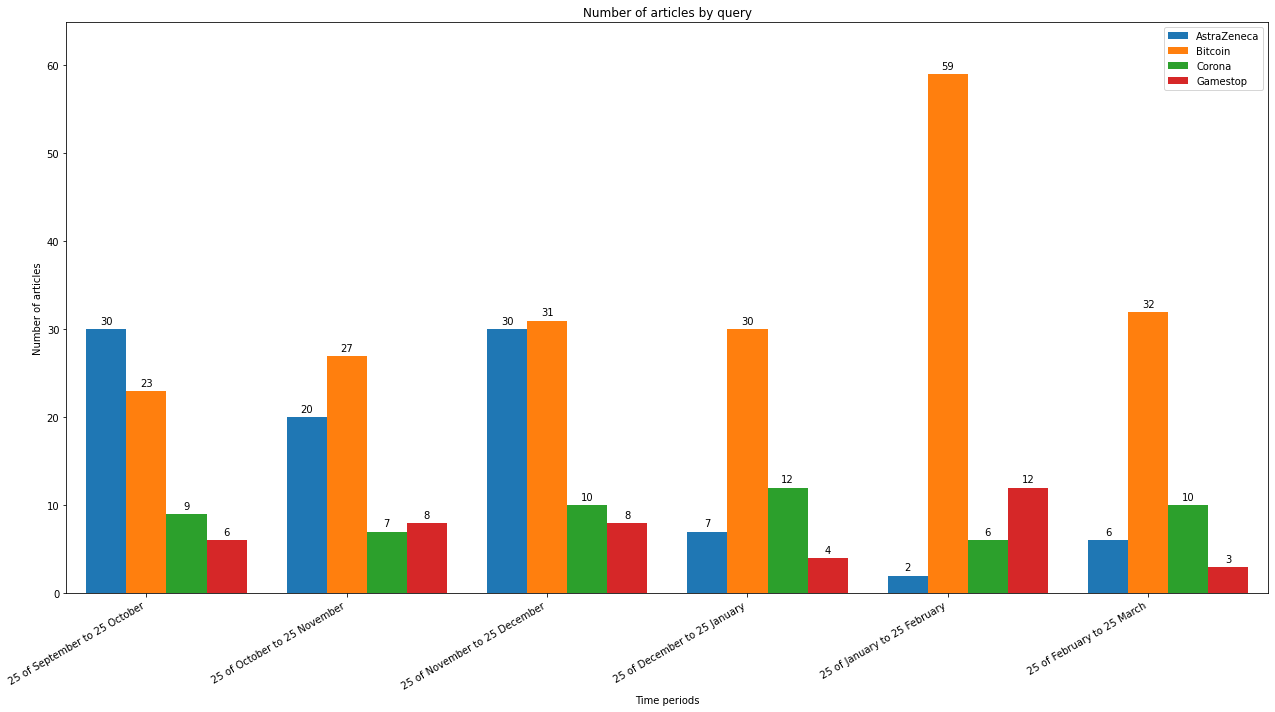

In [54]:
import time
### your code here
## print your results here
search_terms = ["AstraZeneca", "Bitcoin", "Corona", "Gamestop"]
months=["25 of September to 25 October","25 of October to 25 November","25 of November to 25 December","25 of December to 25 January","25 of January to 25 February","25 of February to 25 March"]
dates = ["20210925","20211025","20211125","20211225","20220125","20220225","20220325"]
search_articles={}
for term in search_terms:
  hit=[]
  for idx, date in enumerate(dates[:6]):
      query = search_query(term,date,dates[(idx + 1) % len(dates)])
      hits=hits_calc(query)
      hit.append(hits)
  search_articles[str(term)]=hit

#our plot
plot_no_articles(search_articles, months)


In [57]:
#Your interpretation of the plot here
"""
In End of October to March, Bitcoin articles topped the number of news articles as compared to other types of articles.
In September, Astrazeneca topped the number of news articles.
After December, Astrazeneca results dropped significantly. 
We observed a variation of number of corona articles during the whole time period. 
From end of January to end of Feb, when number of Bitcoin articles were extremely high, there were a significant increase in number of articles on Gamestop as well.
"""


'\nIn End of October to March, Bitcoin articles topped the number of news articles as compared to other types of articles.\nIn September, Astrazeneca topped the number of news articles.\nAfter December, Astrazeneca results dropped significantly. \nWe observed a variation of number of corona articles during the whole time period. \nFrom end of January to end of Feb, when number of Bitcoin articles were extremely high, there were a significant increase in number of articles on Gamestop as well.\n'

#### Visualization

To help you out with the visualization, we have created the code below. In the description of the function you can find instructions on how to use it. There is also an example of a call underneath the function.

You need to give two parameters to the function. The first one is a dictionary where the keys are the three search query terms that you have used (given as a string); for each term there is one list with the number of queries per each time-block considered. The second parameter is a list of strings with the names of the time periods being considered. 

Important note: the lengths of the lists must match. It is assumed that for each query there is a vector having the number of hits per each period specified in the list of the second parameter. This means that the three lists in the dictionary and the list given as the second parameter must have equal lengths.

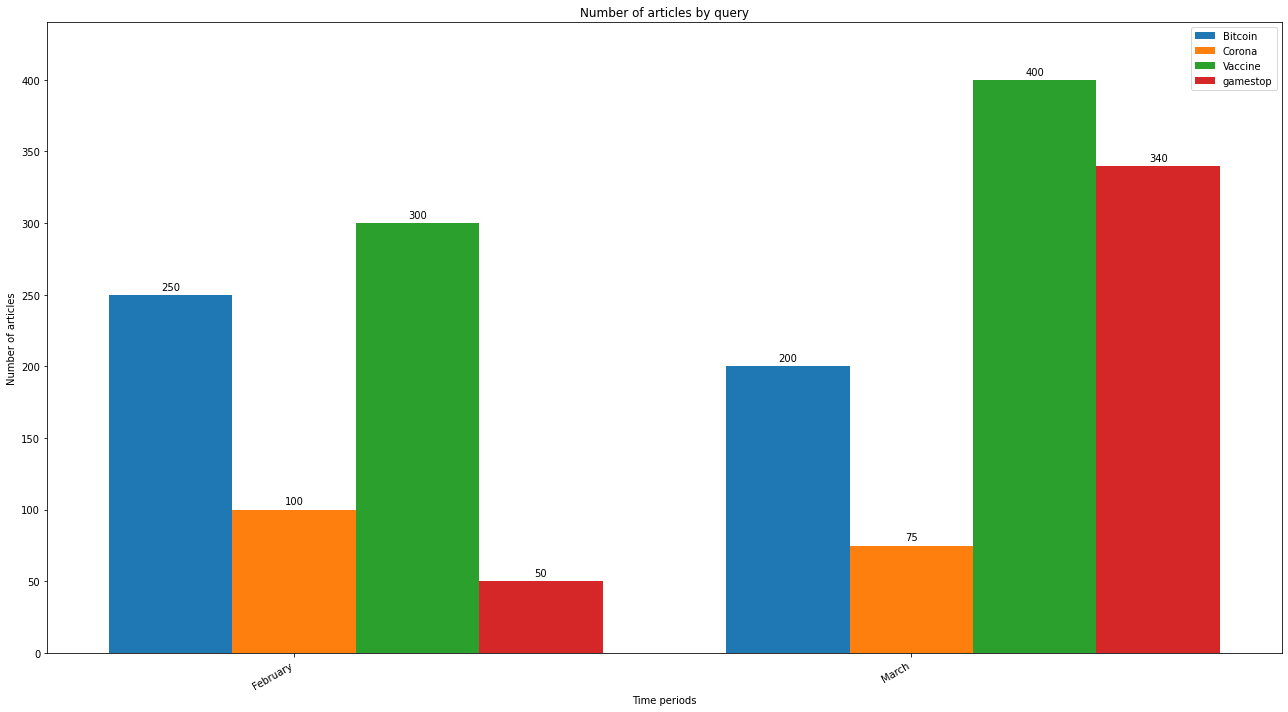

In [ ]:
# This is a pre-implemented function for crating the visualisation
# You don't have to modify this

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

"""def plot_no_articles(dictionary_results, periods):
    '''
    Plots the statistics with the number of articles in the past month.
    
    dictionary_results = dictionary of the form query_term: [no_articles_for_period_1, no_articles_for_period_2, ...]
        e.g. {'Brexit':[250, 200], 'Trump':[100, 75], 'Corona':[300, 400]}
             if you group articles by month periods, and 
             you have looked only at the past two months, and
             there were 250 hits for Brexit in February, and 200 in March, and
             there were 100 hits for Trump in February, and 75 in March, and
             there were 300 hits for Corona in February, and 400 in March
    periods = list of time periods used for the investigation
        e.g. ['February', 'March']
             if you have considered the past two months
    '''
    d = dictionary_results
    labels = periods
    query_terms = list(d.keys())
    list_0 = d[query_terms[0]]
    list_1 = d[query_terms[1]]
    list_2 = d[query_terms[2]]
    list_3 = d[query_terms[3]]
    
    # locations for labels
    x = np.arange(0, len(labels))
    # width per bar
    width = 0.2
    
    # Building the subplots
    fig, ax = plt.subplots(figsize=(18,10))
    rects1 = ax.bar(x - width, list_0, width, label=query_terms[0])
    rects2 = ax.bar(x, list_1, width, label=query_terms[1])
    rects3 = ax.bar(x + width, list_2, width, label=query_terms[2])
    rects4 = ax.bar(x + 2*width, list_3, width, label=query_terms[3])

    # Labeling
    ax.set_xlabel('Time periods')
    ax.set_ylabel('Number of articles')
    ax.set_title('Number of articles by query')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.autoscale()
    xmin = -2*width
    xmax = max(np.arange(len(labels)))+3*width
    ymin = 0
    ymax = max(list_0+list_1+list_2+list_3)*1.1 
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.legend(loc='best')


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() /2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()"""

# Below there is one example of how to use the above plot function
dict_results2 = {'Bitcoin':[250, 200], 'Corona':[100, 75], 'Vaccine':[300, 400], 'gamestop':[50, 340]}
plot_no_articles(dict_results2, ['February', 'March'])